In [4]:
from autograd import grad, hessian
import autograd.numpy as np
from scipy.stats import gaussian_kde

%matplotlib inline
import matplotlib.pyplot as plt

In [69]:

class Model(object):
    def __init__(self, x_info, s_info, true_theta, num_draws):
        self.x_info = x_info
        self.s_info = s_info
        self.true_theta = true_theta
        self.s_draws = np.random.normal(loc=0, scale=1 / np.sqrt(s_info), size=num_draws)
        self.std_draws = np.random.normal(size=num_draws)
        self.x_draws = None
        self.x_dens = None

    def mean_func(self, s, theta):
        return theta * s ** 2
        
    def log_prob_x_given_s(self, x, s, theta):
        return -0.5 * self.x_info * (x - self.mean_func(s, theta)) - 0.5 * np.log(self.x_info)
    
    def log_prob_s(self, s):
        return -0.5 * self.s_info * (s ** 2) - 0.5 * np.log(self.s_info)
    
    def log_joint(self, s, x, theta):
        return self.log_prob_x_given_s(x, s, theta) + self.log_prob_s(s)
    
    def simulate_x(self, theta):
        self.x_draws = self.std_draws / np.sqrt(self.x_info) + model.mean_func(self.s_draws, theta)
        self.x_dens = gaussian_kde(self.x_draws)
        
    def log_prob(self, theta, x_obs):
        self.simulate_x(theta)
        return model.x_dens.logpdf(x_obs)

        

0.992289423216


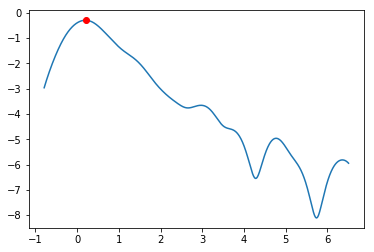

In [70]:
model = Model(x_info=10., s_info=1., true_theta=0.5, num_draws=1000)
#plt.hist(model.x_draws)

theta = 4.0
model.simulate_x(model.true_theta)
x_grid = np.linspace(np.min(model.x_draws), np.max(model.x_draws), 1000)
x_prob = model.x_dens(x_grid)
x_log_prob = model.x_dens.logpdf(x_grid)
delta_x = x_grid[1] - x_grid[0]
print np.sum(delta_x * x_prob)
#plt.plot(x_grid, x_prob)
plt.plot(x_grid, x_log_prob)

x_max_ind = np.argmax(x_log_prob)
x_obs = x_grid[x_max_ind]
plt.plot(x_obs, x_log_prob[x_max_ind], 'ro')
